# National Boundaries Dataset
> Εξετάζουμε την μορφή του National Boundaries Dataset και την μετατροπή του σε μορφη RDF.

Το National Boundary Database(2014)<cite data-cite="7747773/GSWXXBJF"></cite> είναι ενα dataset που περιγράφει τις διοικητικές μονάδες των Ηνωμένων Πολιτειών της Αμερικής . Για την μετατροπή των δεδομένων σε RDF data και την κατασκεύη του γράφου χρησιμοποιούμε το εργαλείο GeoTriples<cite data-cite="7747773/HKUUMBMQ"></cite> .


Ας πάρουμε για παράδειγμα την πολιτεία της **Νέας Υόρκης** . Στο φάκελο data έχουμε το αρχείο gdb , που περιλαμβάνει η NBD για την πολιτεια .Αρχικα , θα κάνουμε χρήση των βιβλιοθηκών fiona <cite data-cite="7747773/TE5IM5WW"></cite> και geopandas <cite data-cite="7747773/AUZNIT2Q"></cite> για την άναγνωση των δεδομένων του gdb.


In [66]:
%matplotlib inline

In [67]:
import fiona 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Νεα Υορκη
<img src="images/1280px-Flag_of_New_York.svg.png" alt="Flag" width="300"  />
<img src="images/New_York_in_United_States.svg" alt="State" width="300" />
Ξεκινάμε διαβάζοντας το αρχείο και εκτύπωνοντας τα δίαφορα layers.

In [68]:
filepath = "./data/GOVTUNIT_New_York_State_GDB.gdb"

layers = fiona.listlayers(filepath)
print(layers)
print(len(layers))

['GU_CountyOrEquivalent', 'GU_IncorporatedPlace', 'GU_StateOrTerritory', 'GU_MinorCivilDivision', 'GU_Reserve', 'GU_NativeAmericanArea', 'GU_Jurisdictional', 'GU_UnincorporatedPlace', 'GU_PLSSFirstDivision', 'GU_PLSSSpecialSurvey', 'GU_PLSSTownship', 'BPFeatureToMetadata', 'Meta_DatasetDetail', 'Meta_ProcessDetail']
14


Το αρχείο περιέχει 14 συνολικά layers . Απο αυτά τα 11 παρακάτω αντιστοιχούν σε γεωγραφικά δεδομένα , ενω τα υπόλοιπα περιέχουν πληροφορίες για τα μεταδεδομένα .

In [69]:
gulayers = ['GU_CountyOrEquivalent', 'GU_IncorporatedPlace', 'GU_StateOrTerritory', 
            'GU_MinorCivilDivision', 'GU_Reserve', 'GU_NativeAmericanArea', 
            'GU_Jurisdictional', 'GU_UnincorporatedPlace', 'GU_PLSSFirstDivision', 
            'GU_PLSSSpecialSurvey', 'GU_PLSSTownship']

Εξετάζουμε την μορφη του κάθε layer.

Αρχικα , παρατηρούμε οτι το πιο πολυπληθές dataset είναι το GU_MinorCivilDivision με 1170 εγγραφές, ένω το λιγοτερο πολυπληθες - μεγαλυτερο του μηδεν - ειναι το StateOrTerritory με 7. 

In [70]:
shapesdf = pd.DataFrame(columns=['Layer Name','Entries','Features'])
dfDict = {}
for idx,layer in enumerate(layers):
    gdf = gpd.read_file(filepath,layer=layer)
    dfDict[layer] = gdf
    shapesdf.loc[idx] = [layer,gdf.shape[0],gdf.shape[1]]
shapesdf = shapesdf.sort_values('Entries')
shapesdf.head(n=14)

,Layer Name,Entries,Features
8,GU_PLSSFirstDivision,0,21
9,GU_PLSSSpecialSurvey,0,20
10,GU_PLSSTownship,0,21
2,GU_StateOrTerritory,7,17
5,GU_NativeAmericanArea,13,18
12,Meta_DatasetDetail,17,25
13,Meta_ProcessDetail,17,15
6,GU_Jurisdictional,43,21
4,GU_Reserve,64,18
0,GU_CountyOrEquivalent,90,20


## State Or Territory


Το Dataset απoτελείται απο 7 εγγραφές . Κάθε μια απο τις εγγράφες αντιστοιχεί σε μια συνορεύουσα πολιτεία .Παρατηρούμε πολλές στήλες που αντιστοιχούν σε χρήσιμες πληροφορίες για κάθε πολιτεία . 
1. Την πηγή του dataset 
2. Την Ημερομηνία δημιουργίας 
3. Ο αριθμός FIPS που είναι μοναδικός για κάθε πολιτεία 
4. Το όνομα της πολιτείας 
5. Τον πληθησμό (δεν είναι συμπληρωμένο) 
6. Το μέγεθος 
7. την γεωμετρική αναπαράσταση.

In [71]:
stateDf = dfDict['GU_StateOrTerritory']
stateDf.head(n=7)

,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,FCode,State_FIPSCode,State_Name,Population2000,AreaSqKM,GNIS_ID,Shape_Length,Shape_Area,geometry
0,0c35ddcb-9001-4c4f-a99e-dc165ac09a2e,36,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,36,New York,None,141296.128900,1779796,25.938952,15.580703,"MULTIPOLYGON (((-79.31214 42.68681, -79.24977 ..."
1,3f74edca-a184-4133-a3b2-ce01c2d8573d,25,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,25,Massachusetts,None,27335.048586,606926,12.000554,2.977855,"MULTIPOLYGON (((-71.49826 42.01727, -71.49907 ..."
2,5d5e9018-2522-4be4-a755-08cf139945f2,44,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,44,Rhode Island,None,4001.456019,1219835,3.675822,0.432129,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ..."
3,0d88ac84-d840-42d6-8630-8a74300edcd1,50,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,50,Vermont,None,24904.594000,1779802,9.832536,2.798214,"MULTIPOLYGON (((-73.31328 44.26413, -73.31274 ..."
4,7cec439c-4b37-477a-9103-259edcdd85bc,09,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,09,Connecticut,None,14358.115826,1779780,5.718063,1.550106,"MULTIPOLYGON (((-73.51808 41.66672, -73.51807 ..."
5,cf7f843c-9d39-446a-8f66-806075fcbf71,34,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,34,New Jersey,None,22592.685085,1779795,8.546806,2.386717,"MULTIPOLYGON (((-75.18960 40.59178, -75.18977 ..."
6,64d9599c-be76-4088-85a6-ac4a4ec31a1b,42,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,42,Pennsylvania,None,119279.036122,1779798,17.837676,12.747187,"MULTIPOLYGON (((-80.51935 41.84956, -80.51938 ..."


Καλώντας την συνάρτηση plot() παράγουμε ενα γράφημα για με τις πληροφορίες του dataset .

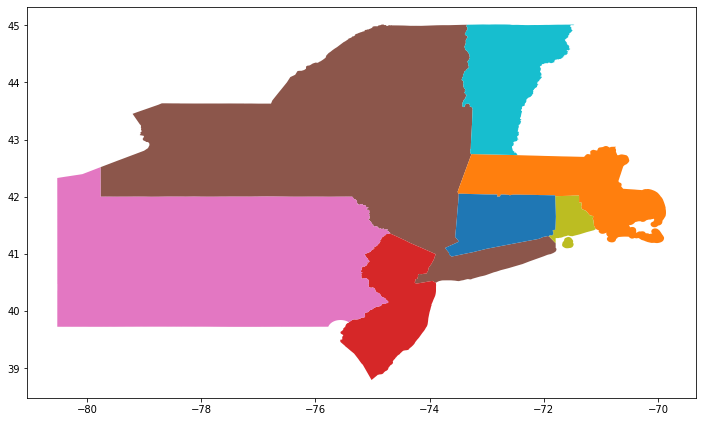

In [72]:
stateDf.plot(column='State_Name',figsize=(12, 20))

## County Or Equivalent
Συνεχίζουμε μελετώντας το layer GU_CountyOrEquivalent .Το dataset περιέχει παρόμοια features με το StateOrTerritory . Περιέχει , επίσης και εγγραφές απο γειτονικές πολιτείες ,(πχ. Wayne County ,PA)

### Data

In [73]:
countyDf = dfDict['GU_CountyOrEquivalent']
nycounties = countyDf.loc[countyDf['State_Name'] == 'New York']
countyDf.head(n=7)

,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,FCode,State_FIPSCode,State_Name,County_FIPSCode,County_Name,StCo_FIPSCode,Population2000,AreaSqKM,GNIS_ID,Shape_Length,Shape_Area,geometry
0,3b6354aa-0aba-4b1f-869e-1ff3f73e5861,36003,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,003,Allegany,36003,None,2679.029191,974100,2.198456,0.292288,"MULTIPOLYGON (((-78.30919 42.26113, -78.30920 ..."
1,d4001bdd-0698-4d27-9e27-5e5be33aa379,36097,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,097,Schuyler,36097,None,886.651825,974146,1.659720,0.096942,"MULTIPOLYGON (((-76.73391 42.29372, -76.73392 ..."
2,9dfd3c57-f0d0-44cd-b9f4-e0f201717d71,42127,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,42,Pennsylvania,127,Wayne,42127,None,1944.081751,1213692,2.633211,0.210118,"MULTIPOLYGON (((-75.45976 41.59504, -75.45980 ..."
3,3ef00c83-bd33-4dbd-a874-1179e1120f53,36091,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,091,Saratoga,36091,None,2185.451813,974143,2.491212,0.241674,"MULTIPOLYGON (((-74.12433 43.15390, -74.12457 ..."
4,acf8f726-7f0b-4c18-940e-759fec8fd1c1,36041,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,041,Hamilton,36041,None,4682.194334,974119,3.444040,0.522459,"MULTIPOLYGON (((-74.82011 43.81851, -74.82038 ..."
5,ec52c387-b1b2-411f-a5ef-d1f9d04501df,36089,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,089,St. Lawrence,36089,None,7307.176197,977309,3.798192,0.826795,"MULTIPOLYGON (((-74.93945 44.98442, -74.93447 ..."
6,cd261b42-7af5-4974-9714-a8ab2baccfc7,36027,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,027,Dutchess,36027,None,2137.634520,974112,2.225778,0.231450,"MULTIPOLYGON (((-73.94041 41.87298, -73.94043 ..."


### Map

62


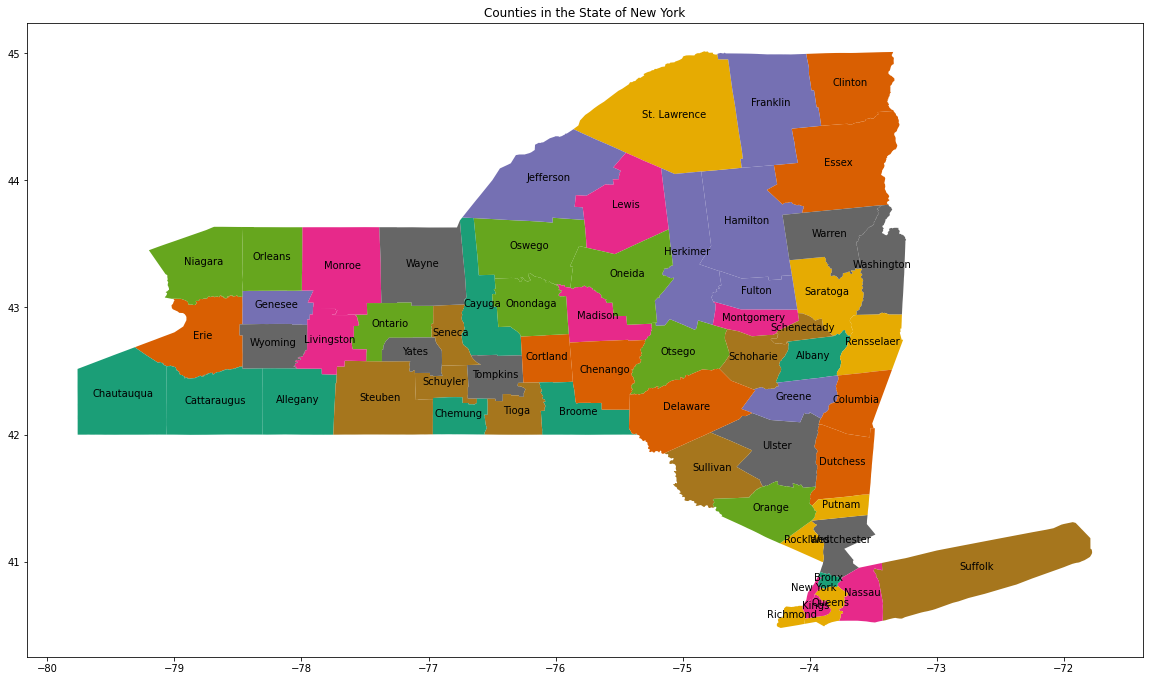

In [74]:
nycounties.plot(column='Source_FeatureID',figsize=(20, 30),cmap="Dark2")
plt.title('Counties in the State of New York')
print(nycounties.shape[0])
for idx, row in nycounties.iterrows():
    plt.annotate(s=row['County_Name'],xy=row.geometry.centroid.coords[0],
                 horizontalalignment='center')


## Minor Civil Division


### Data

In [75]:
minor = dfDict['GU_MinorCivilDivision'].loc[minor['State_Name'] == 'New York']
minor.head(n=7)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

### Map

In [ ]:
minor.plot(column='GNIS_ID',figsize=(12, 20))
plt.title('Minor Civil Division in the State of New York')

## Reserves

### Data

In [ ]:
reserve = dfDict['GU_Reserve']
print(reserve.shape)
reserve.head()

### Map

In [ ]:
reserve.plot(cmap='Dark2',figsize=(20,20))

## Native American Land

### Data

In [ ]:
native = dfDict['GU_NativeAmericanArea']
print(native.shape)
native.head()

### Map

In [ ]:
native.plot(color='red',figsize=(10,20),zorder=2)

## Jurisdictional

### Data

In [ ]:
juris = dfDict['GU_Jurisdictional'].loc[juris['State_Name'] == 'New York']
print(juris.shape)
juris.head()

### Map

In [ ]:
juris.plot(cmap='Dark2',figsize=(10,20))

## Incorporated and Unincorporated Places

### Data

In [ ]:
incorp = dfDict['GU_IncorporatedPlace']
print(incorp.shape)
incorp.head()

In [ ]:
unincorp = dfDict['GU_UnincorporatedPlace']
print(unincorp.shape)
unincorp.head()

### Map

In [ ]:
unincorp.plot(cmap='Dark2',figsize=(10,20))

## All

In [ ]:
reserves = dfDict['GU_Reserve']
print(reserves.shape)
reserves.head(n=64)

In [ ]:
for df in dfDict:
    print(df)
    if len(df) == 0:
        continue
    if df == 'GU_Reserve' or df == 'GU_NativeAmericanArea' :
        dfDict[df].plot(figsize=(12, 20))
    else:
        dfDict[df].loc[dfDict[df]['State_Name'] == 'New York'].plot(figsize=(12, 20))
        plt.title('{} in the State of New York'.format(df))
        
    

## Βιλιογραφία

<div class="cite2c-biblio"></div>